In [68]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## importing data

In [70]:
df = pd.read_csv("weight.csv")

In [72]:
df.head()

,weight,height
0,55,160
1,60,165
2,62,168
3,58,162
4,75,175


## scatter plot

Text(0, 0.5, 'Height')

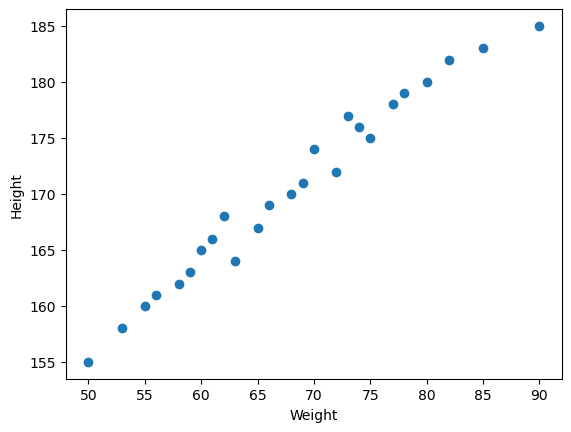

In [74]:
plt.scatter(df['weight'], df['height'])
plt.xlabel("Weight")
plt.ylabel("Height")

## corelation

In [76]:
df.corr()

,weight,height
weight,1.000000,0.987502
height,0.987502,1.000000


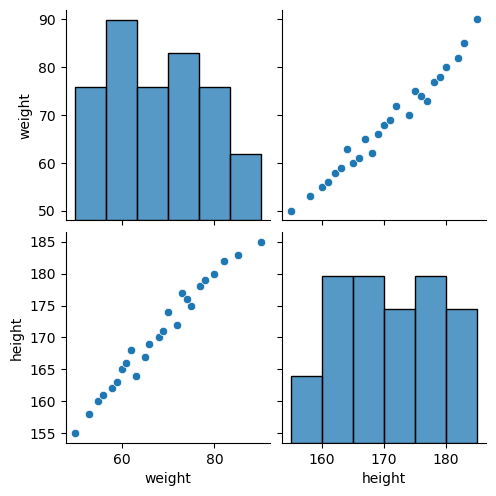

In [78]:
## Seaborn for visualisation
import seaborn as sns
sns.pairplot(df)

In [80]:
# Independent and dependent features
x = df[['weight']]
type(x)

pandas.core.frame.DataFrame

In [84]:
x.shape

(25, 1)

In [86]:
y = df['height']
type(y)
y.shape

(25,)

In [102]:
## Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [104]:
x_train.shape

(18, 1)

In [106]:
x_test.shape

(7, 1)

In [110]:
## standardization
from sklearn.preprocessing import StandardScaler

In [112]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [114]:
x_test = scaler.transform(x_test)

In [116]:
x_test

array([[-2.07732133],
       [-0.83092853],
       [-1.51077915],
       [-0.60431166],
       [ 0.18884739],
       [ 2.45501612],
       [ 1.54854863]])

In [118]:
## Apply linear regression
from sklearn.linear_model import LinearRegression

In [120]:
regression = LinearRegression(n_jobs=-1)

In [122]:
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [124]:
regression.coef_

array([6.97056713])

In [126]:
regression.intercept_

170.77777777777777

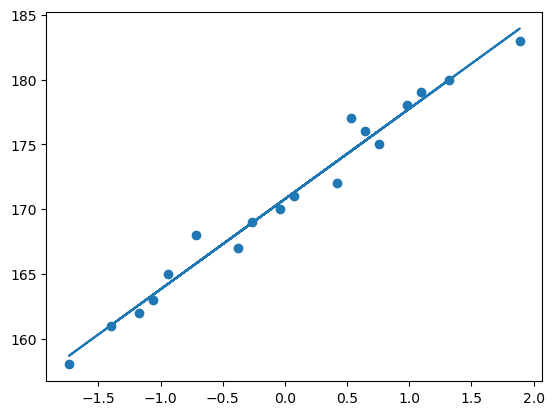

In [130]:
# plot training data plot best fit line
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))

### Prediction of test data
1. predicted height output = intercept + coef_(weights)
2. y_pred_test = 170.77 + 6.97(x_test)

In [132]:
## prediction for test data 
y_pred = regression.predict(x_test)

In [134]:
## performence Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [140]:
Mse = mean_squared_error(y_test,y_pred)
Mae = mean_absolute_error(y_test,y_pred)
Rmse = np.sqrt(Mse)
print("MSE ->",Mse)
print("MAE ->",Mae)
print("Rmse ->",Rmse)

MSE -> 3.075134447950146
MAE -> 1.4783642415596805
Rmse -> 1.7536061267998997


## R square
R^2 = 1-SSR/SST


In [143]:
from sklearn.metrics import r2_score

In [145]:
score = r2_score(y_test,y_pred)
print(score)

0.9716657412655966


### Adjusted R^2 = [(1-R^2)*(N-1)/(N-K-1)]
where:
 - R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [149]:
adj_r2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test[1]-1)

In [157]:
adj_r2

array([0.97511238])

In [173]:
# Prediction for new data
regression.predict(scaler.transform([[63]]))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([166.56538279])